In [2]:
from functions import cleanDF
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Read in the data
# mergedDF = pd.read_csv('../data/mergedClean.csv', index_col=0)
appDF = pd.read_csv('../data/app_nonull.csv')
subscriberDF = pd.read_csv('../data/subscriberClean.csv')

appDF = cleanDF(appDF)
subscriberDF = cleanDF(subscriberDF)

mergedDF = subscriberDF.merge(appDF, on='ID', how='left')
mergedDF = cleanDF(mergedDF)



appDF_start = appDF.copy()
subscriberDF_start = subscriberDF.copy()
fullDF_start = mergedDF.copy()
print(mergedDF.shape)
print(mergedDF.dtypes)
mergedDF.head()

(784204, 27)
ID                                  int64
Language                         category
Subscription Type                category
Subscription Event Type          category
Purchase Store                   category
Purchase Amount                   float64
Currency                         category
Subscription Start Date    datetime64[ns]
Subscription Expiration    datetime64[ns]
Demo User                            bool
Free Trial User                      bool
Free Trial Start Date      datetime64[ns]
Free Trial Expiration      datetime64[ns]
Auto Renew                           bool
Country                          category
User Type                        category
Lead Platform                    category
Email Subscriber                     bool
Push Notifications                   bool
Send Count                          int64
Open Count                          int64
Click Count                         int64
Unique Open Count                   int64
Unique Click Count   

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Free Trial Start Date,Free Trial Expiration,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,App Session Platform,App Activity Type,App Session Date
0,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,2018-12-28,2019-06-28,True,True,NaT,NaT,False,NaN,Consumer,App,True,True,63,7,0,6,0,ios,App Launch,2019-03-20
1,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,2018-12-28,2019-06-28,True,True,NaT,NaT,False,NaN,Consumer,App,True,True,63,7,0,6,0,ios,Completed,2019-04-17
2,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,2018-12-28,2019-06-28,True,True,NaT,NaT,False,NaN,Consumer,App,True,True,63,7,0,6,0,ios,App Launch,2019-04-05
3,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,2018-12-28,2019-06-28,True,True,NaT,NaT,False,NaN,Consumer,App,True,True,63,7,0,6,0,ios,App Launch,2019-04-16
4,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,2018-12-28,2019-06-28,True,True,NaT,NaT,False,NaN,Consumer,App,True,True,63,7,0,6,0,ios,Completed,2019-03-29


In [3]:
# find segments in the data

# # print list of numeric columns
# print(mergedDF.select_dtypes(include=['number']).columns.tolist())
# # print list of categorical columns
# print(mergedDF.select_dtypes(include=['category']).columns.tolist())
# # print list of boolean columns
# print(mergedDF.select_dtypes(include=['bool']).columns.tolist())
# # print list of datetime columns
# print(mergedDF.select_dtypes(include=['datetime']).columns.tolist())

mNumeric = mergedDF.select_dtypes(include=['number']).columns.tolist()
mCategorical = mergedDF.select_dtypes(include=['category']).columns.tolist()
mBoolean = mergedDF.select_dtypes(include=['bool']).columns.tolist()
mDatetime = mergedDF.select_dtypes(include=['datetime']).columns.tolist()


# mergedDF.dtypes

In [11]:
# perform PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# create a copy of the dataframe
subscriberDF_pca = subscriberDF_start.copy()[mNumeric]

# drop the ID column
subscriberDF_pca = subscriberDF_pca.drop(['ID'], axis=1)

# deal with null values
# find null values
print(subscriberDF.isnull().sum())

# purchase amount null values are because they were not purchases 
# fill with 0
subscriberDF_pca["Purchase Amount"].fillna(0, inplace=True)

# drop currency column
# subscriberDF_pca.drop(columns=['Currency'], inplace=True)
# drop free trial date columns
# subscriberDF_pca.drop(columns=['Free Trial Start Date', 'Free Trial Expiration'], inplace=True)
# drop country because we created it from currency
# subscriberDF_pca.drop(columns=['Country'], inplace=True)


print(subscriberDF_pca.isnull().sum()) # output showed no null values

# standardize the data
scaler = StandardScaler()
subscriberDF_pca = scaler.fit_transform(subscriberDF_pca)

# create the PCA instance
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(subscriberDF_pca)

# create a dataframe with the principal components
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

# add the ID column back to the dataframe
principalDF['ID'] = subscriberDF_start['ID']

# merge the dataframes
subscriberPCA_DF = principalDF.merge(subscriberDF_start, on='ID', how='left')

# print the shape of the dataframe
print(subscriberPCA_DF.shape)

ID                         0
Language                   0
Subscription Type          0
Subscription Event Type    0
Purchase Store             0
Purchase Amount            0
Subscription Start Date    0
Subscription Expiration    0
Demo User                  0
Free Trial User            0
Auto Renew                 0
User Type                  0
Lead Platform              0
Email Subscriber           0
Push Notifications         0
Send Count                 0
Open Count                 0
Click Count                0
Unique Open Count          0
Unique Click Count         0
dtype: int64
Purchase Amount       0
Send Count            0
Open Count            0
Click Count           0
Unique Open Count     0
Unique Click Count    0
dtype: int64
(40312, 26)


In [12]:
#cluster using the pca data
from sklearn.cluster import KMeans

# create a copy of the dataframe
subscriberDF_cluster = subscriberPCA_DF.copy()

# drop the ID column
subscriberDF_cluster = subscriberDF_cluster.drop(['ID'], axis=1)

# create the kmeans instance
kmeans = KMeans(n_clusters=3)

# fit the data
kmeans.fit(subscriberDF_cluster)

# predict the labels of the clusters
label = kmeans.predict(subscriberDF_cluster)

# retrieve the centers of each cluster
centers = kmeans.cluster_centers_

# print the labels
print(label)

# create a dataframe with the labels and PC values
clusterDF = pd.DataFrame(data = label, columns = ['cluster'])
clusterDF['PC1'] = subscriberPCA_DF['PC1']
clusterDF['PC2'] = subscriberPCA_DF['PC2']

# plot the data
import matplotlib.pyplot as plt

plt.scatter(clusterDF['PC1'], clusterDF['PC2'], c=clusterDF['cluster'], cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()



ValueError: Cannot cast object dtype to float64

ID                        0
Purchase Amount       13179
Send Count                0
Open Count                0
Click Count               0
Unique Open Count         0
Unique Click Count        0
dtype: int64


c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

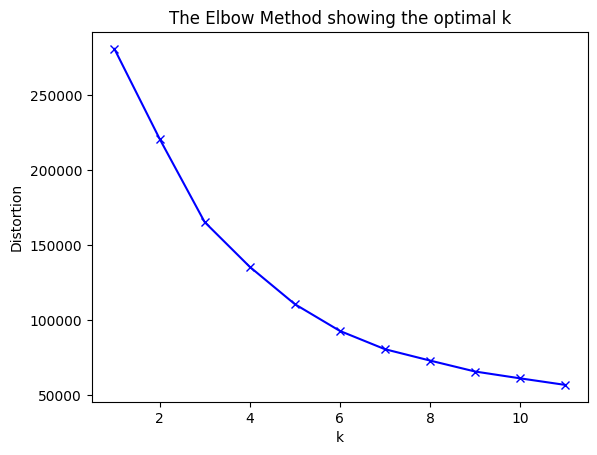

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# use just the numeric columns
numericDF = subscriberDF[mNumeric].copy()


# find null values
print(numericDF.isnull().sum())

# all null values are in purchase columns, meaning they were not purchases
numericDF.fillna(0, inplace=True)


# scale the data
scaler = StandardScaler()
numericDF_scaled = scaler.fit_transform(numericDF)

# find the optimal number of clusters
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

# k means determine k
distortions = []
inertias = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(numericDF_scaled)
    distortions.append(kmeanModel.inertia_)
    inertias.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [20]:
# use optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(numericDF_scaled)
numericDF['cluster'] = kmeans.labels_
numericDF['cluster'].value_counts()



c:\Users\austi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    38505
1     1596
2        1
Name: cluster, dtype: int64

In [21]:
# cluster on categorical data
categoricalDF = mergedDF[mCategorical].copy()
# categoricalDF.fillna('missing', inplace=True)

# find null values
print(categoricalDF.isnull().sum())

from sklearn.cluster import 

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



Language                        0
Subscription Type               0
Subscription Event Type         0
Purchase Store                  0
Currency                   361138
Country                    361138
User Type                       0
Lead Platform                   0
App Session Platform        16383
App Activity Type           16383
dtype: int64


ValueError: could not convert string to float: 'POR'

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# hierarchical clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

subscriberDF = subscriberDF_start.copy()

# deal with null values
# find null values
print(subscriberDF.isnull().sum())

# purchase amount null values are because they were not purchases 
# fill with 0
subscriberDF["Purchase Amount"].fillna(0, inplace=True)

# drop currency column
subscriberDF.drop(columns=['Currency'], inplace=True)

# drop free trial date columns
subscriberDF.drop(columns=['Free Trial Start Date', 'Free Trial Expiration'], inplace=True)

# drop country because we created it from currency
subscriberDF.drop(columns=['Country'], inplace=True)

# drop ID column
subscriberDF.drop(columns=['ID'], inplace=True)

# check for null values
subscriberDF.isnull().sum()

ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount            13179
Currency                   13178
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Free Trial Start Date      34269
Free Trial Expiration      34269
Auto Renew                     0
Country                    13178
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                     0
Open Count                     0
Click Count                    0
Unique Open Count              0
Unique Click Count             0
dtype: int64


Language                   0
Subscription Type          0
Subscription Event Type    0
Purchase Store             0
Purchase Amount            0
Subscription Start Date    0
Subscription Expiration    0
Demo User                  0
Free Trial User            0
Auto Renew                 0
User Type                  0
Lead Platform              0
Email Subscriber           0
Push Notifications         0
Send Count                 0
Open Count                 0
Click Count                0
Unique Open Count          0
Unique Click Count         0
dtype: int64

In [31]:
# perform hierarchical clustering

# use just the numeric columns except ID
numericDF = subscriberDF[mNumeric[1:]].copy()

# scale the data
scaler = StandardScaler()
numericDF_scaled = scaler.fit_transform(numericDF)

# start hierarchical clustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

clustering = AgglomerativeClustering(n_clusters=3).fit(numericDF_scaled)
clustering.labels_

# add cluster labels to dataframe
subscriberDF['cluster'] = clustering.labels_
subscriberDF['cluster'].value_counts()


0    39593
2      508
1        1
Name: cluster, dtype: int64

In [32]:
# plot dendrogram
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(numericDF_scaled, 'ward')

# plot the dendrogram
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()



: 

: 

In [4]:
subscriberDF_start.dtypes

ID                                  int64
Language                         category
Subscription Type                category
Subscription Event Type          category
Purchase Store                   category
Purchase Amount                   float64
Currency                         category
Subscription Start Date    datetime64[ns]
Subscription Expiration    datetime64[ns]
Demo User                            bool
Free Trial User                      bool
Free Trial Start Date      datetime64[ns]
Free Trial Expiration      datetime64[ns]
Auto Renew                           bool
Country                          category
User Type                        category
Lead Platform                    category
Email Subscriber                     bool
Push Notifications                   bool
Send Count                          int64
Open Count                          int64
Click Count                         int64
Unique Open Count                   int64
Unique Click Count                

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
subscriberDF = subscriberDF_start.copy()

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Replace NaN values in numeric columns with 0, and categorical columns with the mode value
for col in subscriberDF.columns:
    if subscriberDF[col].dtype == "float64":
        subscriberDF[col] = subscriberDF[col].fillna(0)
    else:
        subscriberDF[col] = subscriberDF[col].fillna(subscriberDF[col].mode()[0])

# Scale the numeric columns
scaler = StandardScaler()
numeric_cols = subscriberDF.select_dtypes(include=[np.number]).columns.tolist()
subscriberDF[numeric_cols] = scaler.fit_transform(subscriberDF[numeric_cols])

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=2)
    kproto.fit(subscriberDF.to_numpy(), categorical=[col in categorical_cols for col in subscriberDF.columns])
    costs.append(kproto.cost_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kproto = KPrototypes(n_clusters=3, init='Huang', n_init=5, verbose=2)
clusters = kproto.fit_predict(subscriberDF.to_numpy(), categorical=[col in categorical_cols for col in subscriberDF.columns])

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = numeric_cols[i*2+j]
        y_col = numeric_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters)
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()


AssertionError: All columns are categorical, use k-modes instead of k-prototypes.

In [18]:
# Import necessary libraries
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Load the data
subscriberDF = subscriberDF_start.copy()

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Replace NaN values with the mode value
subscriberDF = subscriberDF.fillna(subscriberDF.mode().iloc[0])

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=2)
    kmodes.fit(subscriberDF.to_numpy())
    costs.append(kmodes.cost_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kmodes = KModes(n_clusters=3, init='Huang', n_init=5, verbose=2)
clusters = kmodes.fit_predict(subscriberDF.to_numpy())

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = categorical_cols[i*2+j]
        y_col = categorical_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters)
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 301323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 301323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 301323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 301323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 301323.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...


KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import cudf
import cupy
import matplotlib.pyplot as plt
from cuml.preprocessing import StandardScaler
from cuml.cluster import KMeans

# Load the data
subscriberDF = pd.read_csv("subscriber_data.csv")

# Remove the ID column since it's not useful for clustering
subscriberDF = subscriberDF.drop("ID", axis=1)

# Convert the categorical columns to integer type
categorical_cols = subscriberDF.select_dtypes(include=['category']).columns.tolist()
for col in categorical_cols:
    subscriberDF[col] = subscriberDF[col].cat.codes.astype(int)

# Fill missing values with the mode value
subscriberDF = subscriberDF.fillna(subscriberDF.mode().iloc[0])

# Standardize the data
scaler = StandardScaler()
subscriberDF_scaled = scaler.fit_transform(subscriberDF.values.astype(np.float32))

# Convert the data to a cuDF dataframe
subscriberDF_cudf = cudf.DataFrame.from_gpu_matrix(cupy.asarray(subscriberDF_scaled))

# Choose the number of clusters
costs = []
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means||', n_init=5, verbose=2)
    kmeans.fit(subscriberDF_cudf)
    costs.append(kmeans.inertia_)
plt.plot(range(1, 10), costs)
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")
plt.show()

# Fit the model with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means||', n_init=5, verbose=2)
clusters = kmeans.fit_predict(subscriberDF_cudf)

# Visualize the results using scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    for j in range(2):
        x_col = categorical_cols[i*2+j]
        y_col = categorical_cols[(i+1)*2-1-j]
        axs[i][j].scatter(subscriberDF[x_col], subscriberDF[y_col], c=clusters.to_array())
        axs[i][j].set_xlabel(x_col)
        axs[i][j].set_ylabel(y_col)
plt.show()
